# EDA

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd

module_path = os.path.abspath(os.path.join(os.pardir, 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modules import dataloading as dl
from modules import Viz

import matplotlib.pyplot as plt
import seaborn as sns

targetdir = "../data/extracted/"
figtargetdir = "../images/"

## Liquid net worth generally

In [2]:
df = pd.read_stata('../data/extracted/scf2019s/p19i6.dta', columns=dl.sel_vars)
df.columns = [x.lower() for x in df.columns]
df.rename(columns=dl.rename_dict, inplace=True)
df = dl.clean_SCF_df(df)
df.head()

,imputed_hh_id,weighting,persons_in_PEU,spouse_part_of_PEU,ref_next_relative_type,switch_of_resp_ref,ref_age,spouse_age,ref_sex,spouse_sex,...,checking_accts_value,savings_accts_value,lqd_assets,educ_bins,doctorate_deg,master_deg,bachelor_deg,assoc_deg,hs_deg,1k_target
household_id,,,,,,,,,,,,,,,,,,,,,
1,13.0,26036.854458,1.0,1.0,0.0,5.0,75.0,0.0,2.0,0.0,...,6000.0,0.0,550000.0,3,0,0,1,0,0,1
2,23.0,18969.956098,5.0,2.0,1.0,1.0,50.0,39.0,1.0,2.0,...,759.0,8.0,767.0,1,1,0,0,0,0,0
3,33.0,20483.071126,2.0,2.0,1.0,1.0,53.0,49.0,1.0,2.0,...,3750.0,0.0,6750.0,1,1,0,0,0,0,1
4,43.0,31785.437408,2.0,2.0,2.0,5.0,29.0,28.0,1.0,2.0,...,3500.0,10006.0,21506.0,4,0,0,0,1,0,1
5,53.0,21046.096210,2.0,2.0,2.0,5.0,47.0,39.0,1.0,2.0,...,-1.0,0.0,-1.0,1,1,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5777 entries, 1 to 5813
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   imputed_hh_id           5777 non-null   float64
 1   weighting               5777 non-null   float64
 2   persons_in_PEU          5777 non-null   float64
 3   spouse_part_of_PEU      5777 non-null   float64
 4   ref_next_relative_type  5777 non-null   float64
 5   switch_of_resp_ref      5777 non-null   float64
 6   ref_age                 5777 non-null   float64
 7   spouse_age              5777 non-null   float64
 8   ref_sex                 5777 non-null   float64
 9   spouse_sex              5777 non-null   float64
 10  ref_race                5777 non-null   float64
 11  spouse_race             5777 non-null   float64
 12  ref_educ                5777 non-null   float64
 13  spouse_educ             5777 non-null   float64
 14  ref_UE_last_year        5777 non-null   

In [4]:
df.lqd_assets.describe()

count    5.777000e+03
mean     2.086218e+06
std      1.512738e+07
min     -2.000000e+00
25%      1.918000e+03
50%      1.500000e+04
75%      1.250320e+05
max      4.727030e+08
Name: lqd_assets, dtype: float64

## Liquid Assets Viz

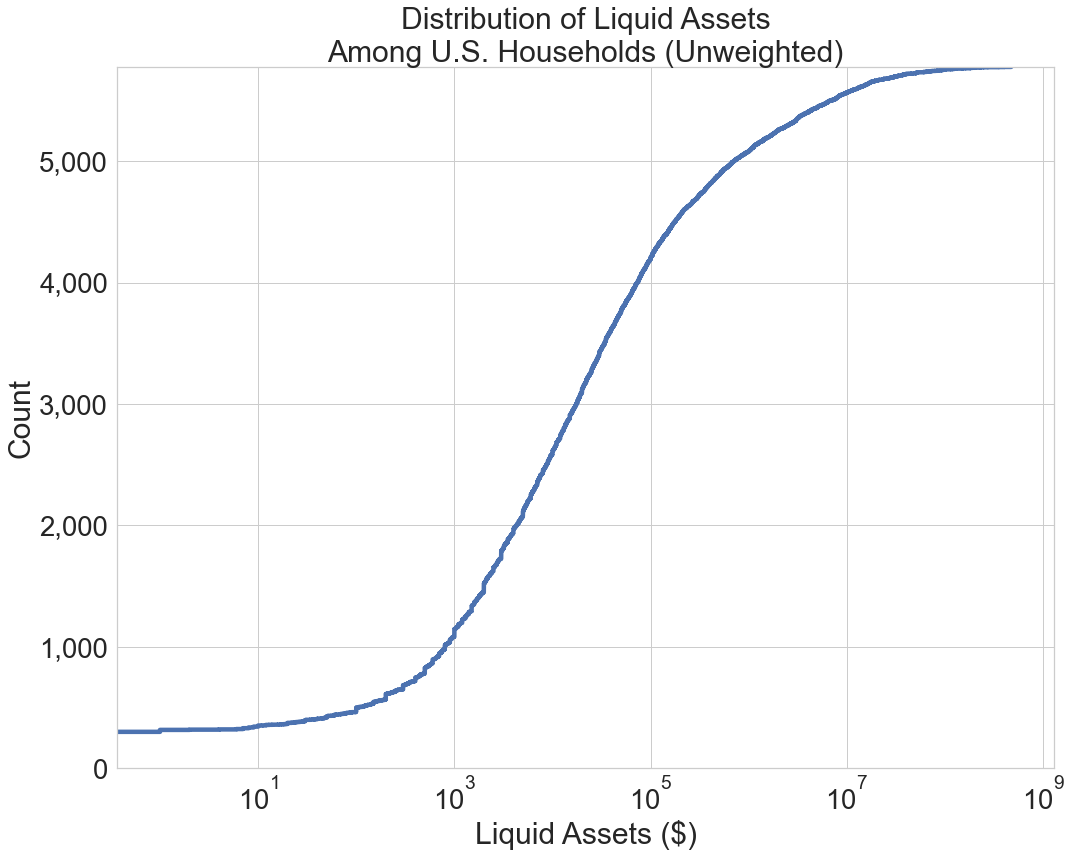

In [5]:
Viz.lqdassetsViz(df, figtargetdir)

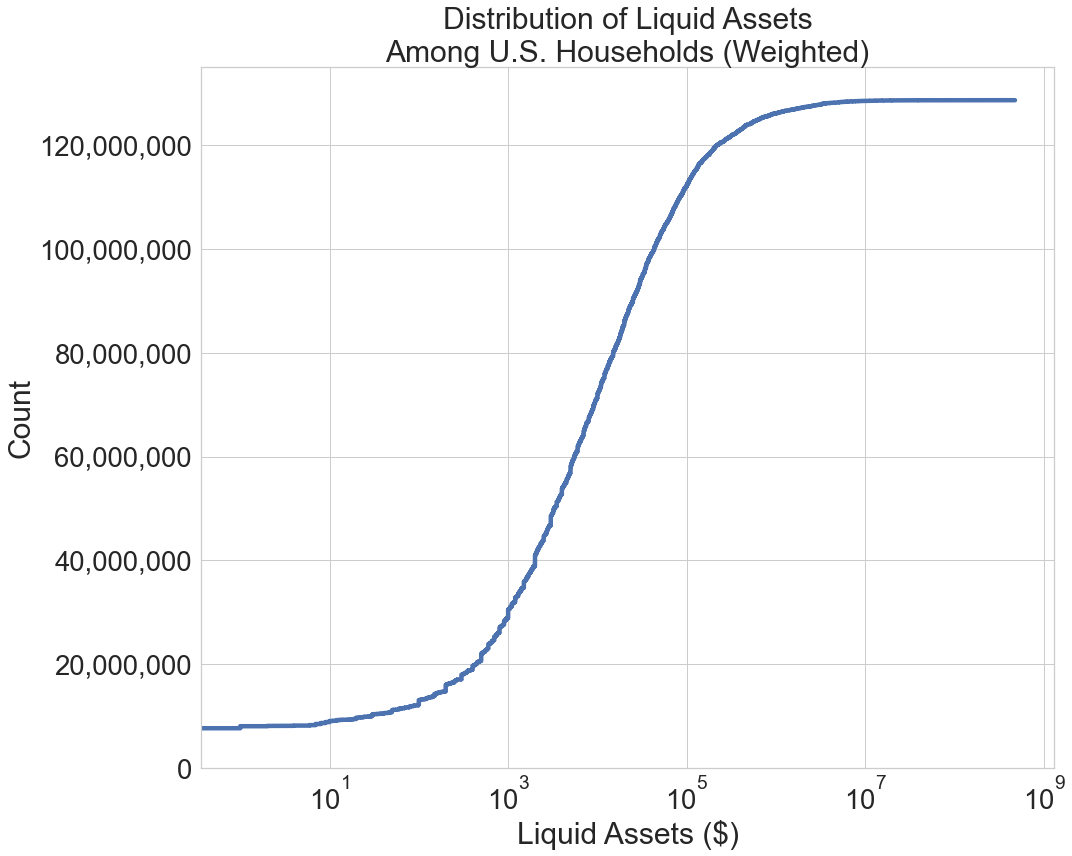

In [6]:
Viz.lqdassetsViz(df, figtargetdir, weighted=True)

## Target var

### Counts

In [7]:
# Unweighted
df['1k_target'].value_counts()

1    4638
0    1139
Name: 1k_target, dtype: int64

In [8]:
# Weighted
df.groupby('1k_target').weighting.sum()

1k_target
0    3.035921e+07
1    9.828322e+07
Name: weighting, dtype: float64

In [9]:
# Multipliers
zero_target = df.groupby('1k_target').weighting.sum()[0]/df['1k_target'].value_counts()[0]
zero_target_str = '{:,.2f}'.format(zero_target)
print(f'Multiplier for target values of zero: {zero_target_str}')

one_target = df.groupby('1k_target').weighting.sum()[1]/df['1k_target'].value_counts()[1]
one_target_str = '{:,.2f}'.format(one_target)
print(f'Multiplier for target values of one: {one_target_str}')

Multiplier for target values of zero: 26,654.26
Multiplier for target values of one: 21,190.86


### Breakdown of lqd_assets

In [10]:
df.lqd_assets.describe()

count    5.777000e+03
mean     2.086218e+06
std      1.512738e+07
min     -2.000000e+00
25%      1.918000e+03
50%      1.500000e+04
75%      1.250320e+05
max      4.727030e+08
Name: lqd_assets, dtype: float64

In [11]:
# Total amount of liquid assets outside of target
tot_nontarget = df.groupby('1k_target').lqd_assets.sum()[0] #9.42 bn weighted
tot_nontarget_str = '{:,.2f}'.format(tot_nontarget)
print(tot_nontarget_str)

353,312.00


In [12]:
# Total amount of liquid assets within target
tot_target = df.groupby('1k_target').lqd_assets.sum()[1] #255 tn weighted
tot_target_str = tot_nontarget_str = '{:,.2f}'.format(tot_target)
print(tot_target_str)

12,051,727,613.00


In [13]:
df.lqd_assets.quantile(.95)

6436880.799999995

### Age

In [14]:
df.ref_age.describe()

count    5777.000000
mean       53.219837
std        16.244778
min        18.000000
25%        40.000000
50%        54.000000
75%        65.000000
max        95.000000
Name: ref_age, dtype: float64

In [15]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df['age_bins'] = pd.cut(x=df['ref_age'], bins=[17, 29, 45, 59, 75, 95])



In [16]:

df['age_bins'].value_counts()

(59, 75]    1724
(45, 59]    1655
(29, 45]    1422
(17, 29]     499
(75, 95]     477
Name: age_bins, dtype: int64

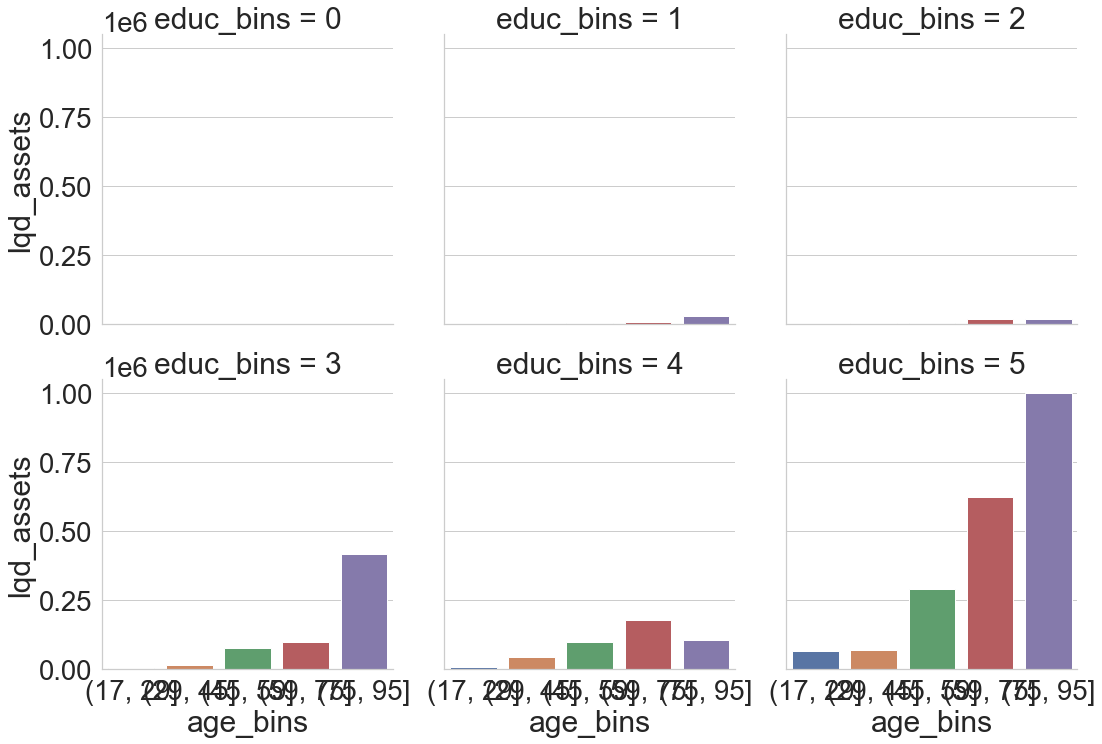

In [23]:
sns.catplot(x="age_bins",
            y='lqd_assets',
            col="educ_bins", 
            col_wrap=3,
            data=df,
            kind='bar',
            ci=None,
            estimator=np.median
           )

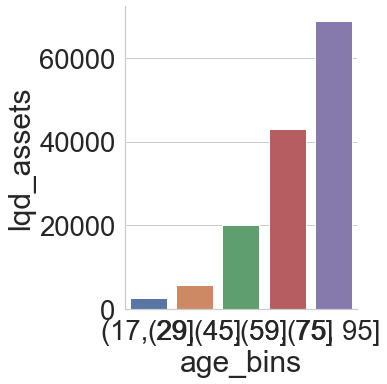

In [32]:
my_func = np.median

sns.catplot(x="age_bins",
            y='lqd_assets',
            data=df,
            kind='bar',
            estimator=my_func,
            ci=None
           )